# Project No. 2 - Boston Housing
### Authors:
M. Alejandro Villalobos C.
Óscar Ruiz Ramirez
Sofía Vargas Aceves
### Fecha:
6 de Marzo, 2022
### Description:
Segundo proyecto Machine Learning. Data mining : Boston Housing Prices
Link al video: localhost:3000

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

## Read Data

In [2]:
#Primero tomamos los datos del csv y verificamos los nombres de las columnas
boston_datasets = pd.read_csv("./boston_corrected.csv", sep=None)
boston_datasets.keys()

C:\Users\Alex\AppData\Local\Temp/ipykernel_10800/741160264.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  boston_datasets = pd.read_csv("./boston_corrected.csv", sep=None)


Index(['OBS.', 'TOWN', 'TOWN#', 'TRACT', 'LON', 'LAT', 'MEDV', 'CMEDV', 'CRIM',
       'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

### Data Structure

In [3]:
#Ahora almacenamos los datos en una tabla y los visualizamos para darnos una idea del contenido
boston = pd.DataFrame(boston_datasets[['CMEDV', 'CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
'PTRATIO', 'B', 'LSTAT']])

boston.head()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
#Nos aseguramos que no existan datos nulos en nuestro dataframe, ya que comprometerian el analisis
boston.isnull().sum()

CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

C:\Users\Alex\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


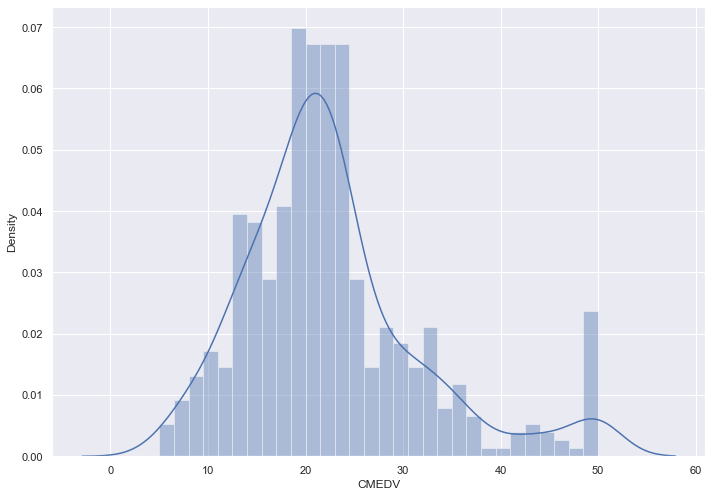

In [5]:
#Visualizamos el MEDV (corregido) en una gráfica

# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})
# plot a histogram showing the distribution of the target values
sns.distplot(boston['CMEDV'], bins=30)
plt.show()

#observamos que, a pesar de ser los valores "corregidos" hay un pico o outlier en el 50

## Data Preprocessing

In [6]:
#Creamos la matriz de correlacion
correlation_matrix = boston.corr().round(2)

<AxesSubplot:>

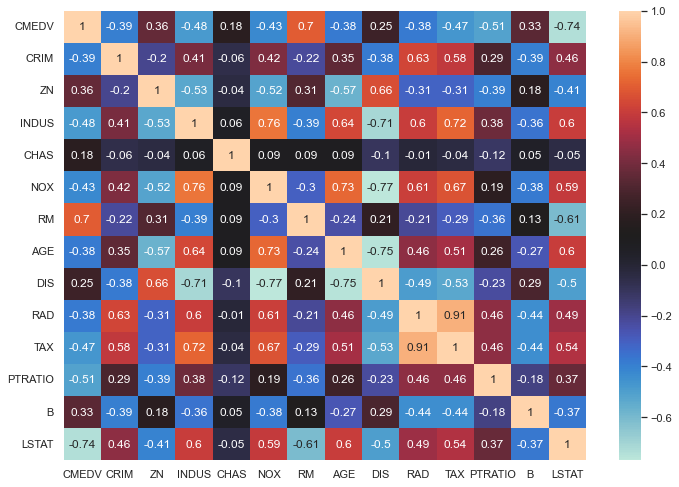

In [7]:
#Visualizamos nuestra matriz en un heatmap
#Valores rojos son cercanos a 1, azules cercanos a -1 y negros a 0
sns.color_palette("cubehelix", as_cmap=True)
sns.heatmap(data=correlation_matrix, annot=True, cmap = "icefire")

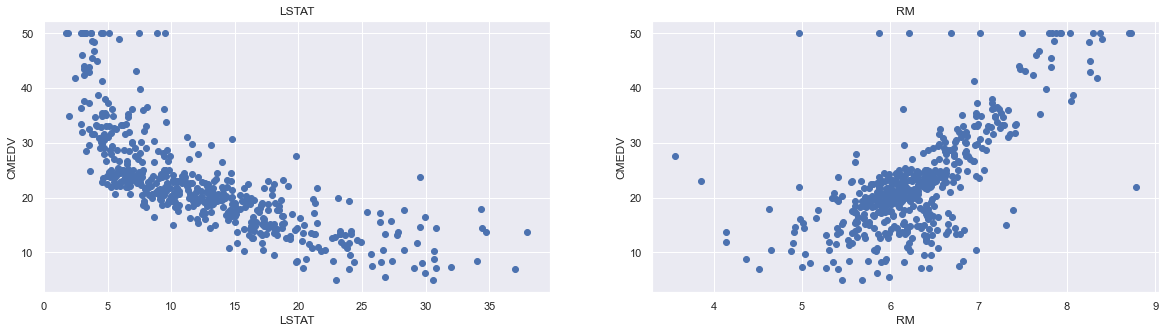

In [8]:
#Graficamos LSTAT y RM vs CMEDV

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['CMEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('CMEDV')

#LSTAT parece tener una relacion inversamente proporcional con CMEDV
#RM tiene una relacion directamente proporcional aunque con un gran número de outliers

In [9]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['CMEDV']

In [10]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


## Model Creation and training

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

## Prediction of New Data

In [12]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.582615161992101
R2 score is 0.6352858407973474


The model performance for testing set
--------------------------------------
RMSE is 5.166041116588189
R2 score is 0.6608015292184086


## Visualization of Results

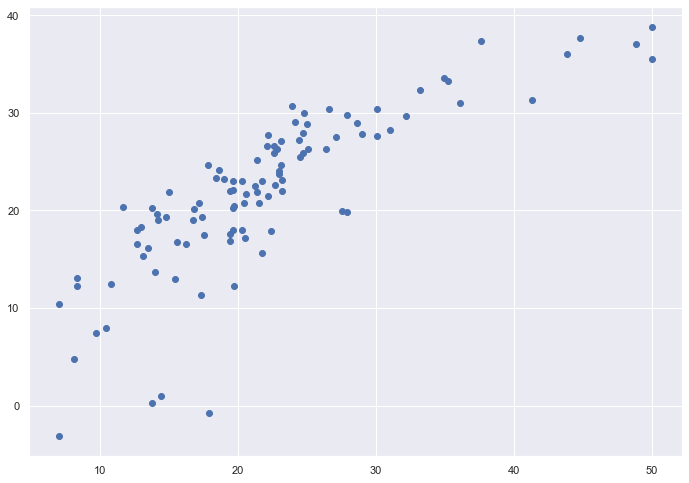

In [13]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()